_____

<div style="border: 6px solid #18453B; padding: 10px; border-radius: 5px;">
   <img src="https://ucanalytics.com/blogs/wp-content/uploads/2017/09/Logistic-Regression-Loss-Function-3D-plot.jpg" alt="Placeholder image">
    <h1 style="color: #4CAF50;">CMSE 830: ICA  Regression</h1>
    <p>Let's explore regression, loss function and model sensitivity.</p>
 
</div>


____

You will turn in one notebook with the names of all of your group members. 

____

#### Fake Data

Your first task is to define some functions. Have each person in your group invent their own function - or maybe three, or maybe five. Be inventive and creative: explore. These are the functions that you will use to make fake, noisy data from;then, you will fit to that data. 

Here is just one way you might do this. (Do this however your group likes to think about this.)

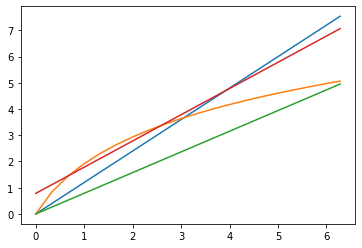

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def my_function_1(x, A, B): # yes, this is linear
    return A * B * x

def my_function_2(x, A, B):
    return A*np.log(x+1) + B*np.log(2*x+1) # this is not linear

def my_function_3(x, A, B):
    return x*np.log(B*A+1) #yes, this is linear 

def my_function_4(x, A, B):
    return(np.sqrt(A) * np.square(B) + x) #yes, this is linear

def my_function(x, A, B, which_model):
    match which_model:
        case 1:
            return my_function_1(x, A, B)
        case 2:
            return my_function_2(x, A, B)
        case 3:
            return my_function_3(x, A, B)
        case 4: 
            return my_function_4(x, A, B)

x = np.linspace(0, 2 * np.pi, 20) # vary the number of points
true_A, true_B = 1.5, 0.8

plt.plot(x, my_function(x, true_A, true_B, 1))
plt.plot(x, my_function(x, true_A, true_B, 2))
plt.plot(x, my_function(x, true_A, true_B, 3))
plt.plot(x, my_function(x, true_A, true_B, 4))

Now that you have a set of true functions, let's add noise to them to make them more like real data. Write some functions to do this, which might look like:

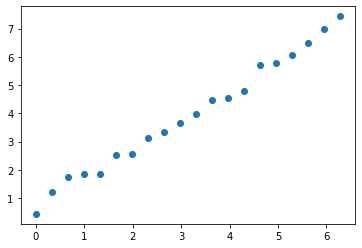

In [11]:
# finish this code by adding your functions to it and commenting it
# also, greatly improve the visualization

def generate_data(A, B, x, my_func, noise_level=0.2): # vary the level of noise
    y = my_func(x, A, B) + np.random.normal(0, noise_level, x.shape)
    return y

y_1 = generate_data(true_A, true_B, x, my_function_1)
y_2 = generate_data(true_A, true_B, x, my_function_2)
y_3 = generate_data(true_A, true_B, x, my_function_3)
y_4 = generate_data(true_A, true_B, x, my_function_4)

# plot of the models your group has proposed
plt.plot(x, y_4, 'o')

_______

##### Grid Search

Next, we are going to explore the loss function. Modify the code below to plot the loss function. You will perform a grid search on this loss function so it is important to think through the ranges of the parameters you are seeking before making this plot. 

In [26]:
def grid_search(x, y, A_range, B_range, which):
    loss = np.zeros((len(A_range), len(B_range)))
    for i, A in enumerate(A_range):
        for j, B in enumerate(B_range):
            y_pred = my_function(x, A, B, which)
            loss[i, j] = np.mean((y - y_pred) ** 2)
    return loss

A_range = np.linspace(0, 1.5, 5) 
B_range = np.linspace(0, 1.5, 4)
loss_1 = grid_search(x, y_1, A_range, B_range, 1)
loss_2 = grid_search(x, y_2, A_range, B_range, 2)
loss_3 = grid_search(x, y_3, A_range, B_range, 3)
loss_4 = grid_search(x, y_4, A_range, B_range, 4)

What did this code do? What is in the variable `loss_1`? 

 - **The variable Loss_1 is returning the mean square error for each A and B combination possible between the arrays A_range, B_range and the given y value generated from the generate data function**

In [27]:
loss_1
loss_2
loss_3
loss_4

array([[0.6608127 , 0.6608127 , 0.6608127 , 0.6608127 ],
       [0.6608127 , 0.44287845, 0.07032569, 0.38690441],
       [0.6608127 , 0.36633649, 0.04540787, 1.38552683],
       [0.6608127 , 0.31305706, 0.11354013, 2.59351192],
       [0.6608127 , 0.27181919, 0.22983867, 3.90987112]])

What you to do is find the lowest value in this array and connect those to which values of $A$ and $B$ gave that lowest value. How can you do that? The simplest way would be to rewrite the code to loop over $A$ and $B$, compute the loss at each value, and store the lowest values of the parameters seen. 

Feel free to do it that way if your group wishes. It is the clearest way to think about finding the minimum value of the loss because it is a brute force check on all of the values. 

Before you get too far, however, be sure that your grid search is spanning the ranges of the parameters that bracket the minimum. For this simple problem with only two parameters you can plot the loss to ensure you have bracketed the minimum. Here is some code to start with.

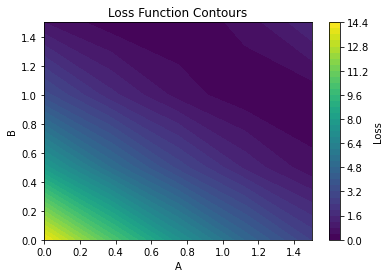

In [28]:
def plot_loss_function_contours(A_range, B_range, loss):
    A_grid, B_grid = np.meshgrid(A_range, B_range)
    plt.contourf(A_grid, B_grid, loss.T, levels=40, cmap='viridis')
    plt.colorbar(label='Loss')
    plt.title('Loss Function Contours')
    plt.xlabel('A')
    plt.ylabel('B')
    plt.show()
    
plot_loss_function_contours(A_range, B_range, loss_2)



Ok, if your group doesn't want to write the double `for` loops over $A$ and $B$ to store the minimum loss, we can learn a bit of fancy Python to do this in one step. 

Work through this code with your group. 
* what does `argmin` mean? (this is important notation in optimization!)
  __Retrieves the indices of the minimum values of an array along an axis__
* what does `argmin` return? a number? two numbers? an array?
  __Array of indices into the input array__
* what does `unravel_index` do?
__Converts a flat index or array of flat indices into a tuple of coordinate arrays.__
* why does `unravel_index` require two arguments, and what is `.shape` returning?
__Unravel_index needs the shape/dimensions of the array (2nd argument) to use for unraveling the indices in the 1st argument.__

In [29]:
min_index = np.unravel_index(np.argmin(loss_1), loss_1.shape)
print(min_index)

(2, 3)


______

#### Get the best parameters and plot the prediction

In [30]:
def find_best_fit_params(loss, A_range, B_range):
    best_idx = np.unravel_index(np.argmin(loss), loss.shape)
    A_best, B_best = A_range[best_idx[0]], B_range[best_idx[1]]
    return A_best, B_best

A_best_1, B_best_1 = find_best_fit_params(loss_1, A_range, B_range) 
A_best_2, B_best_2 = find_best_fit_params(loss_2, A_range, B_range)
A_best_3, B_best_3 = find_best_fit_params(loss_3, A_range, B_range) 
A_best_4, B_best_4 = find_best_fit_params(loss_4, A_range, B_range)  


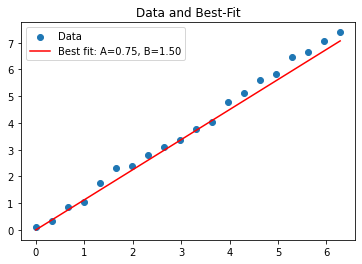

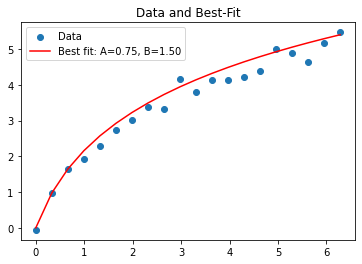

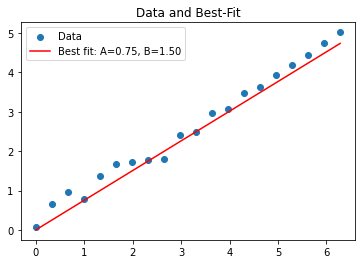

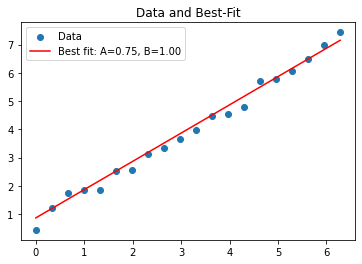

In [31]:
def plot_data_and_best_fit(x, y, A_best, B_best, which):
    plt.scatter(x, y, label='Data')
    y_fit = my_function(x, A_best, B_best, which)
    plt.plot(x, y_fit, 'r-', label=f'Best fit: A={A_best:.2f}, B={B_best:.2f}')
    plt.title('Data and Best-Fit')
    plt.legend()
    plt.show()

plot_data_and_best_fit(x, y_1, A_best_1, B_best_1, 1)

plot_data_and_best_fit(x, y_2, A_best_2, B_best_2, 2)

plot_data_and_best_fit(x, y_3, A_best_3, B_best_3, 3)

plot_data_and_best_fit(x, y_4, A_best_4, B_best_4, 4)

____

#### Sensitivity Analysis

You have noticed that sometimes the loss function has a broad minimum. This means that the value of the loss near the minimum is not too sensitive to the values of the parameters. We can perform a sensitivity analysis on this to quantitfy how sensitive our model is to the final values of its parameters.  First let's visualize the size and shape of the loss's minimum. Modify this to code to work with the cases your group is considering. 

Again, be sure your grid search is spanning an appropriate range of parameters!

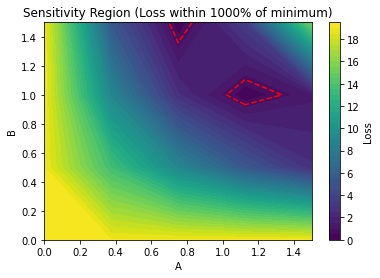

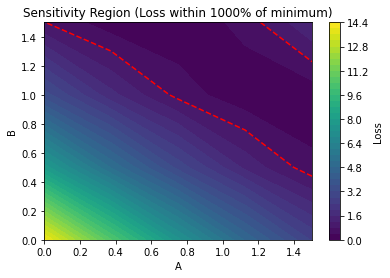

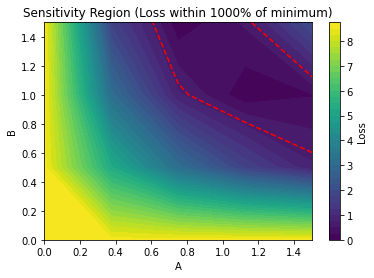

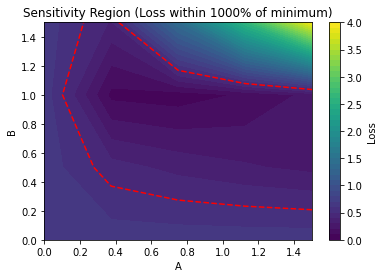

In [38]:
def plot_confidence_region(A_range, B_range, loss, loss_min, threshold=0.05):
        A_grid, B_grid = np.meshgrid(A_range, B_range)
        
        # Plot the loss function contours
        plt.contourf(A_grid, B_grid, loss.T, levels=40, cmap='viridis')
        plt.colorbar(label='Loss')

        # Overlay the region where the loss is within the specified threshold
        plt.contour(A_grid, B_grid, loss.T, levels=[loss_min * (1 + threshold)], colors='red', linestyles='dashed')
        
        plt.title(f'Sensitivity Region (Loss within {threshold*100}% of minimum)')
        plt.xlabel('A')
        plt.ylabel('B')
        plt.show()
    
loss_min = np.min(loss_1)
plot_confidence_region(A_range, B_range, loss_1, loss_min, threshold=10)

loss_min = np.min(loss_2)
plot_confidence_region(A_range, B_range, loss_2, loss_min, threshold=10)

loss_min = np.min(loss_3)
plot_confidence_region(A_range, B_range, loss_3, loss_min, threshold=10)

loss_min = np.min(loss_4)
plot_confidence_region(A_range, B_range, loss_4, loss_min, threshold=10)

Finally, we can sample values of $A$ and $B$ inside that red contour. These are "reasonable" values of the parameters -- they yield nearly the same loss -- but they all give different predictions. Let explore this sensitivity. Comment this code. 

In [41]:
threshold = 0.5
valid_indices = np.where(loss <= loss_min * (1 + threshold))
    
A_valid = A_range[valid_indices[0]]
B_valid = B_range[valid_indices[1]]
    
# Randomly sample from these valid (A, B) pairs
idxs = np.random.choice(len(A_valid), size=1000, replace=True)
A_samples = A_valid[idxs]
B_samples = B_valid[idxs]

NameError: name 'loss' is not defined

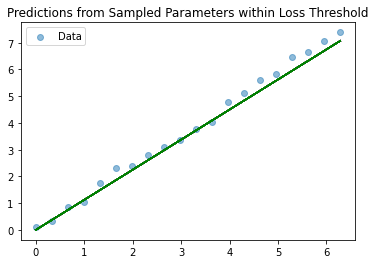

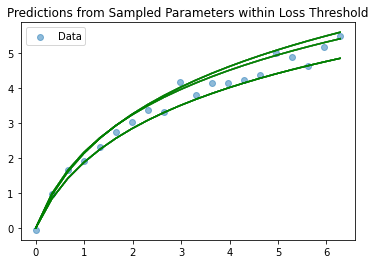

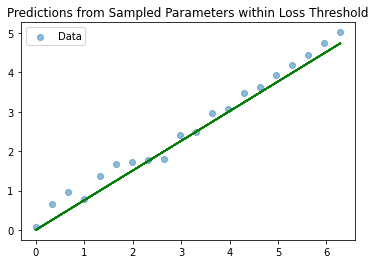

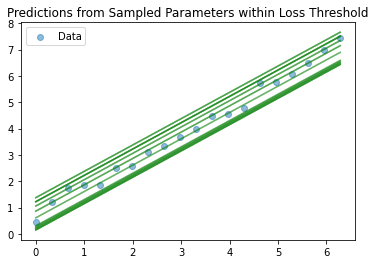

In [55]:
def sample_within_loss_threshold(A_range, B_range, loss, loss_min, threshold=0.05):
    # Sample within a region where the loss is within the threshold
    valid_indices = np.where(loss <= loss_min * (1 + threshold))
    
    A_valid = A_range[valid_indices[0]]
    B_valid = B_range[valid_indices[1]]
    
    # Randomly sample from these valid (A, B) pairs
    idxs = np.random.choice(len(A_valid), size=1000, replace=True)
    A_samples = A_valid[idxs]
    B_samples = B_valid[idxs]
    
    return A_samples, B_samples
    
def plot_sampled_predictions(x, y, A_samples, B_samples, which):
    plt.scatter(x, y, label='Data', alpha=0.5)

    for A, B in zip(A_samples[:100], B_samples[:100]):
        y_sample = my_function(x, A, B, which)
        plt.plot(x, y_sample, 'g-', alpha=0.1)
    
    plt.title('Predictions from Sampled Parameters within Loss Threshold')
    plt.legend()
    plt.show()

A_samples, B_samples = sample_within_loss_threshold(A_range, B_range, loss_1, loss_min, threshold=0.6) 
plot_sampled_predictions(x, y_1, A_samples, B_samples, 1)

A_samples, B_samples = sample_within_loss_threshold(A_range, B_range, loss_2, loss_min, threshold=2) 
plot_sampled_predictions(x, y_2, A_samples, B_samples, 2)

A_samples, B_samples = sample_within_loss_threshold(A_range, B_range, loss_3, loss_min, threshold=3) 
plot_sampled_predictions(x, y_3, A_samples, B_samples, 3)

A_samples, B_samples = sample_within_loss_threshold(A_range, B_range, loss_4, loss_min, threshold=10) 
plot_sampled_predictions(x, y_4, A_samples, B_samples, 4)



______

Write a summary of your findings. You might include:
* what types of functions did your group use? linear? non-linear? did it matter? if so, why? if not, why not?
 - **We used some linear and non-linear functions**
* what happened to the results in general as you varied the number of data points, or the range of the $x$ values? 
 - **
* what did you observe as the noise level was varied? 
* what were some issues with the grid search? 
* and so on.....you get the idea.....